In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
okved_ref = pd.read_csv('okved_ref.csv')
okved_ref2 = okved_ref[okved_ref['ver'] == 2]
okved_cat = okved_ref2[['id', 'o0']]
okved_dict = dict(zip(okved_cat['id'].values, okved_cat['o0'].values))

In [4]:
org2  = pd.read_csv('Org2_filtr_by_income.csv')
org2.drop_duplicates(subset=['inn'])
df = org2[['inn', 'okved_id']]
inn_dict = dict(zip(df['inn'].values, df['okved_id'].values))

def okved_by_inn(inn):
    id = inn_dict[inn]
    return okved_dict[id]

def okved_group(num):
    if num in range(1, 4):
        return 'A'
    elif num in range(5, 10):
        return 'B'
    elif num in range(10, 34):
        return 'C'
    elif num == 35:
        return 'D'
    elif num in range(36, 40):
        return 'E'
    elif num in range(41, 44):
        return 'F'
    elif num in range(45, 48):
        return 'G'
    elif num in range(49, 54):
        return 'H'
    elif num in (55, 56):
        return 'I'
    elif num in range(58, 64):
        return 'J'
    elif num in range(64, 67):
        return 'K'
    elif num == 68:
        return 'L'
    elif num in range(69, 76):
        return 'M'
    elif num in range(77, 83):
        return 'N'
    elif num == 84:
        return 'O'
    elif num == 85:
        return 'P'
    elif num in range(86, 89):
        return 'Q'
    elif num in range(90, 94):
        return 'R'
    elif num in range(94, 97):
        return 'S'
    elif num in (97, 98):
        return 'T'
    elif num == 99:
        return 'U'
    else:
        return 'oops'
    

In [5]:
df = pd.read_csv('company_fin_df.csv')
df.reset_index(drop=True)
inn_list = df['inn']
okved_list = []
for inn in inn_list:
    try:
        id = okved_by_inn(inn)
    except KeyError:
        id = -1
        
    okved_list.append(id)
    
df['okved'] = okved_list
df = df[df['okved'] != -1]
df['okved_group'] = [okved_group(num) for num in df['okved'].values]
df.to_csv('company_fin_okved.csv')
df

,Unnamed: 0.1,Unnamed: 0,inn,income,short_name,full_name,region,city,latitude,longitude,...,Revenue,Gross profit,Interest profit,Interest expences,EBIT,Profit,Interest rate,Material Assets,okved,okved_group
1,1,290833,5504036333,2070008652000,ООО &quot;ГАЗПРОМНЕФТЬ-УРАЛ (НБ)&quot;,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ &quot...,66,ГОРОД ЕКАТЕРИНБУРГ,56.821102,60.649418,...,4.849752e+11,6.266542e+10,1.032000e+10,1.341651e+10,-2.998806e+09,-2.802774e+09,0.009214,1.816013e+12,52,H
2,2,290832,5504036333,2070008652000,ООО &quot;ГАЗПРОМНЕФТЬ-УРАЛ (АЗС)&quot;,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ &quot...,66,ГОРОД ЕКАТЕРИНБУРГ,56.821102,60.649418,...,4.849752e+11,6.266542e+10,1.032000e+10,1.341651e+10,-2.998806e+09,-2.802774e+09,0.009214,1.816013e+12,52,H
3,3,290831,5504036333,2070008652000,ООО &quot;МАЛО-ЯМАЛЬСКОЕ&quot;,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ &quot...,89,ГОРОД НОВЫЙ УРЕНГОЙ,66.092257,76.686521,...,4.849752e+11,6.266542e+10,1.032000e+10,1.341651e+10,-2.998806e+09,-2.802774e+09,0.009214,1.816013e+12,52,H
4,4,290829,8602060555,1524947700000,ПАО &quot;СУРГУТНЕФТЕГАЗ&quot;,ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО &quot;СУРГУТНЕФ...,86,Г. СУРГУТ,61.250704,73.367743,...,3.198884e+11,9.237023e+10,2.207062e+10,0.000000e+00,7.384360e+10,6.208008e+10,0.000000,3.740044e+12,6,B
5,5,290828,2310031475,1280929622000,АО &quot;ТАНДЕР&quot;,АКЦИОНЕРНОЕ ОБЩЕСТВО &quot;ТАНДЕР&quot;,23,Г. КРАСНОДАР,44.517742,38.138414,...,1.396525e+12,3.408920e+11,2.976034e+09,1.679946e+10,1.799876e+10,1.298490e+10,0.041987,5.398965e+11,47,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5008,5008,283276,6829045090,2413008000,ООО &quot;РАЙ&quot;,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ &quot...,68,Г. ТАМБОВ,52.724776,41.453203,...,1.380262e+09,8.739400e+07,0.000000e+00,0.000000e+00,5.010000e+06,4.008000e+06,0.000000,8.217650e+08,46,G
5009,5009,283273,4027131618,2411734000,ООО &quot;МАНУФАКТУРЫ БОСКО&quot;,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ &quot...,40,Г. КАЛУГА,54.536984,36.284765,...,9.974500e+07,-1.183800e+07,2.408500e+07,1.690200e+07,-1.061560e+08,-8.642600e+07,0.010384,2.173153e+09,14,C
5010,5010,283272,6452109727,2411636000,ООО &quot;НИТА-ФАРМ&quot;,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ &quot...,64,Г. САРАТОВ,52.005230,47.810685,...,1.891464e+09,9.647840e+08,2.300000e+04,1.473600e+07,3.649810e+08,2.879410e+08,0.056123,1.745913e+09,21,C
5011,5011,283271,5204012980,2411567000,ООО &quot;ННПП-2&quot;,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ &quot...,52,NaN,55.783750,44.776319,...,2.082859e+09,3.975990e+08,4.524000e+06,2.789890e+08,4.218900e+07,6.401100e+07,0.058718,5.522934e+09,1,A


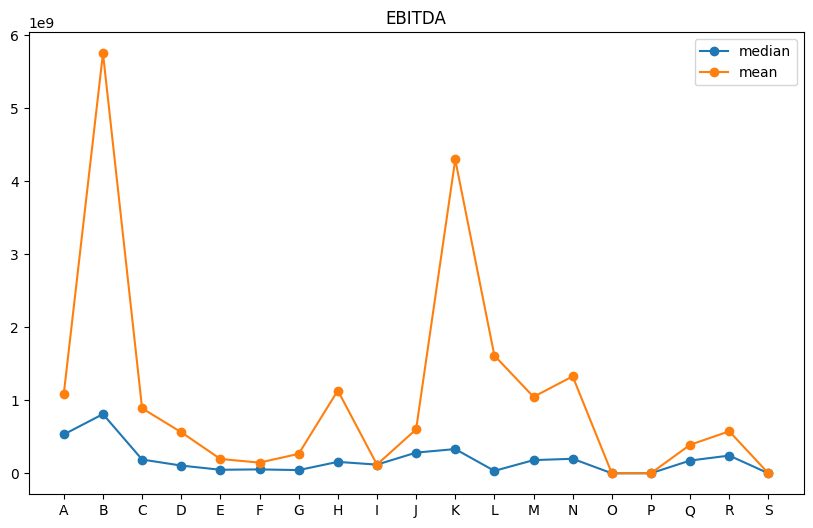

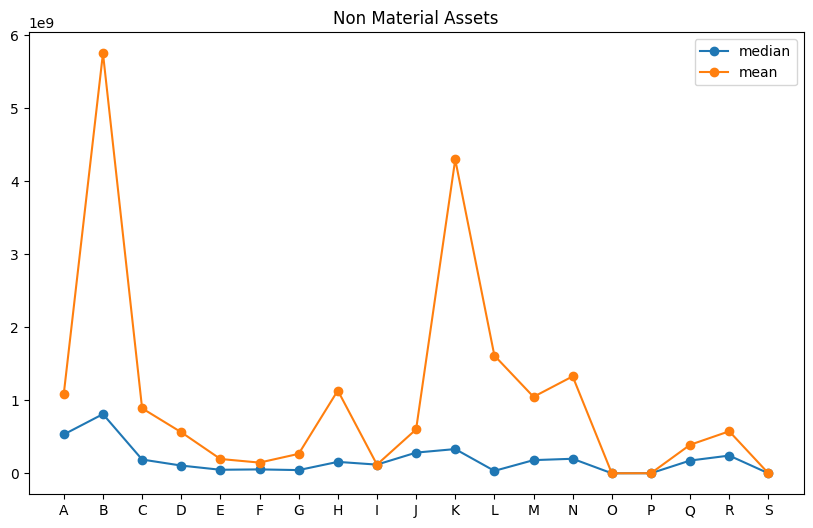

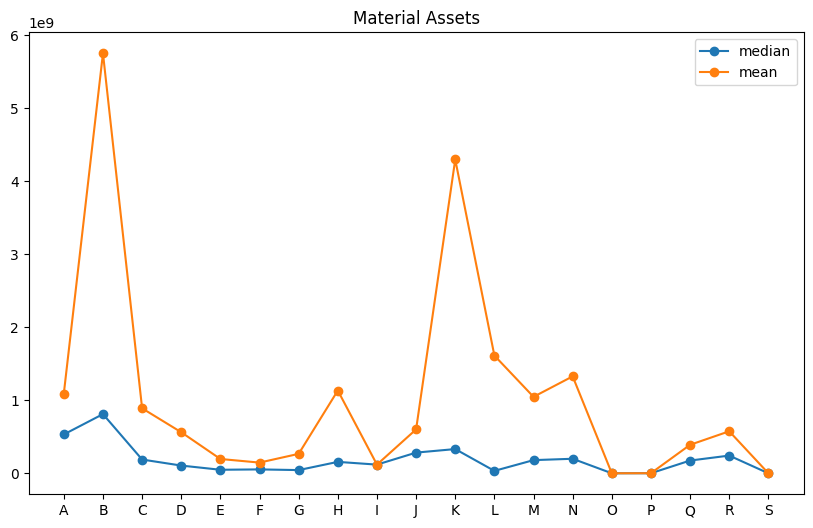

In [6]:
mean_profit = df.groupby('okved_group').EBIT.mean()
median_profit = df.groupby('okved_group').EBIT.median()
x = median_profit.index
plt.figure(figsize=(10, 6))
plt.title('EBITDA')
plt.plot(x, median_profit.values, 'o-', label='median')
plt.plot(x, mean_profit.values, 'o-', label='mean')
plt.legend()
plt.show()


mean_nm = df.groupby('okved_group')['Non Material'].mean()
median_nm = df.groupby('okved_group')['Non Material'].median()
plt.figure(figsize=(10, 6))
plt.title('Non Material Assets')
plt.plot(x, median_profit.values, 'o-', label='median')
plt.plot(x, mean_profit.values, 'o-', label='mean')
plt.legend()
plt.show()

mean_mat = df.groupby('okved_group')['Material Assets'].mean()
median_mat = df.groupby('okved_group')['Material Assets'].median()
plt.figure(figsize=(10, 6))
plt.title('Material Assets')
plt.plot(x, median_profit.values, 'o-', label='median')
plt.plot(x, mean_profit.values, 'o-', label='mean')
plt.legend()
plt.show()

In [7]:
okved_names = ['Сельское, лесное хозяйство, охота, рыболовство и рыбоводство', 
               'Добыча полезных ископаемых',
               'Обрабатывающие производства',
               'Обеспечение электрической энергией, газом и паром; кондиционирование воздуха',
               'Водоснабжение; водоотведение, организация сбора и утилизации отходов, деятельность по ликвидации загрязнений',
               'Строительство',
               'Торговля оптовая и розничная; ремонт автотранспортных средств и мотоциклов',
               'Транспортировка и хранение',
               'Деятельность гостиниц и предприятий общественного питания',
               'Деятельность в области информации и связи',
               'Деятельность финансовая и страховая',
               'Деятельность по операциям с недвижимым имуществом',
               'Деятельность профессиональная, научная и техническая',
               'Деятельность административная и сопутствующие дополнительные услуги',
               'Государственное управление и обеспечение военной безопасности; социальное обеспечение',
               'Образование',
               'Деятельность в области здравоохранения и социальных услуг',
               'Деятельность в области культуры, спорта, организации досуга и развлечений',
               'Предоставление прочих видов услуг',
               # 'Деятельность домашних хозяйств как работодателей; недифференцированная деятельность частных домашних хозяйств по производству товаров и оказанию услуг для собственного потребления',
               # 'Деятельность экстерриториальных организаций и органов'
               ]

stats = pd.DataFrame({'Okved Group': x, 
                      'Okved Group Name': okved_names,
                      'EBITDA Mean': mean_profit, 
                      'EBITDA Median': median_profit,
                      'Non Material Assets Mean': mean_nm,
                      'Non Material Assets Median': median_nm,
                      'Material Assets Mean': mean_mat,
                      'Material Assets Median': median_mat,
                      })

stats.to_csv('okved_group_stats.csv', index=False)